<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q3-PLN/blob/main/2023_Q3_PLN_AULA_15_Notebook_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q3]**
Prof. Alexandre Donizeti Alves

## **Grandes Modelos de Linguagem**
---


*Large Language Models (LLM)*

# Agrupamento de Textos com apoio de LLM

## Conjunto de dados

Vamos usar uma base de *tweets* para praticar.

Download e leitura da base de dados

In [ ]:
!gdown --id 1Hd0ytKZrR3s22FheUJt4EZOpZ4eWyTrN

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Hd0ytKZrR3s22FheUJt4EZOpZ4eWyTrN
To: /content/tweets_corona_virus.zip
100% 4.60M/4.60M [00:00<00:00, 27.3MB/s]


In [ ]:
!unzip tweets_corona_virus.zip

Archive:  tweets_corona_virus.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [ ]:
import pandas as pd

df_tweets = pd.read_csv('Corona_NLP_train.csv',encoding = "ISO-8859-1")
df_tweets

UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1      advice Talk to your neighbours family to excha...            Positive  
2      Coronavirus Australia: Woolworths to give elde...            Positive  
3      My food stock is not the only one which is emp...            Positive  
4      Me, ready to go at supermarket during the #COV...  Extremely Negative  
...                                                  ...                 ...  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative  

[41157 rows x 6 columns]

***SentenceTransformers Documentation***

*`SentenceTransformers`  is a Python framework for state-of-the-art sentence, text and image embeddings. The initial work is described in our paper **Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks**.*

>

*You can use this framework to compute sentence / text embeddings for more than 100 languages. These embeddings can then be compared e.g. with cosine-similarity to find sentences with a similar meaning. This can be useful for semantic textual similar, semantic search, or paraphrase mining.*

>

https://www.sbert.net/

Instalando um *encoder* (`sbert`) para geração de `embeddings` dos dados textuais:

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=4c188f68ff5d098cf1f5b981d4fa18f954af3dc5016c6613755f62e7200921bb
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


Carregando um modelo pré-treinado para geração de *embeddings*.
Esse modelo é multilingual e oferece suporte para português e inglês.

https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2

*This is a sentence-transformers model: It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.*

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

**Espaço latente** é uma representação intermediárias de informação quando processamos um conjunto de dados. Ele se refere a um espaço multidimensional abstrato contendo valores de variáveis ​​latentes que, não mapeamos diretamente, **mas codificam uma representação interna significativa do conjunto de dados**.

>

**`latente`**: `não aparente, não manifesto; oculto, encoberto`

>

Referência:

> [O que é um Espaço Latente em deep learning?](https://raphael-abreu.github.io/blog/2021/helloworld/#:~:text=Ent%C3%A3o%20um%20espa%C3%A7o%20latente%20%C3%A9,significativa%20do%20conjunto%20de%20dados)



***Word Embeddings***

* Representações vetoriais de palavras densas (valores diferentes de 0).

* Assumem uma dimensão fixa (geralmente 300).

* Obtidos a partir de redes neurais.

Agora, estamos mapeando os textos para um espaço latente (*embeddings*).

Cada *tweet* será mapeado para um espaço vetorial de `384 dimensões`.

In [ ]:
embeddings =  model.encode(df_tweets.OriginalTweet.to_list())

In [ ]:
embeddings.shape

(41157, 384)

In [ ]:
embeddings

array([[-0.06808283,  0.17462339, -0.04126394, ..., -0.05197799,
        -0.06655101,  0.04080975],
       [-0.0710702 ,  0.03066975, -0.08707599, ...,  0.12752149,
        -0.06385355,  0.28665546],
       [ 0.26239464,  0.02567205,  0.04355603, ..., -0.48043552,
        -0.14150383, -0.03823399],
       ...,
       [-0.16402811, -0.16581814, -0.09560185, ..., -0.1872638 ,
        -0.12616426,  0.17218445],
       [-0.04669749, -0.03569421,  0.2831314 , ..., -0.10428203,
        -0.11457625, -0.05002542],
       [-0.05276905, -0.24668513,  0.01983874, ..., -0.48036152,
        -0.25590628,  0.10397704]], dtype=float32)

**Dissimilaridade**

Se considerarmos que dois objetos possuem n atributos diferenciaveis em comum, podemos entender que o conceito de **dissimilaridade** é uma forma generalizada da distância entre eles. Portanto, daqui em diante, trataremos tanto a **distância** quanto a **dissimilaridade** como a mesma coisa.

Referência:

> [Métricas de distância e dissimilaridade](https://diegoinacio.medium.com/metricas-de-distancia-e-dissimilaridade-94f9d8d962d4)

Aqui, podemos gerar um `grafo`. Cada *tweet* é um vértice e as arestas são geradas pela **dissimilaridade de cosseno**.

In [ ]:
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import radius_neighbors_graph

import numpy as np
import networkx as nx

A = radius_neighbors_graph(embeddings, 0.2, metric='cosine',  include_self=False, mode='distance')

G = nx.Graph(A.toarray())

In [ ]:
G.number_of_nodes()

41157

In [ ]:
G.number_of_edges()

40660

Além do grafo, vamos gerar um agrupamento dos *tweets*.

No exemplo abaixo, geramos 10 clusters. Faça alterações aqui para explorar novas soluções.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(embeddings)
df_tweets['cluster_label'] = kmeans.labels_

In [ ]:
df_tweets

UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1      advice Talk to your neighbours family to excha...            Positive   
2      Coronavirus Australia: Woolworths to give elde...            Positive   
3      My food stock is not the only one which is emp...            Positive   
4      Me, ready to go at supermarket during the #COV...  Extremely Negative   
...                                                  ...                 ...   
41152  Airline pilots offering to stock supermarket s...             Neutral   
41153  Response to complaint not provided citing COVI...  Extremely Negative   
41154  You know itÂs getting tough when @KameronWild...            Positive   
41155  Is it wrong that the smell of hand sanitizer i...             Neutral   
41156  @TartiiCat Well new/used Rift S are going for ...            Negative   

       cluster_label  
0                  0  
1                  9  
2                  3  
3                  8  
4                  3  
...              ...  
41152              1  
41153              2  
41154              5  
41155              6  
41156              4  

[41157 rows x 7 columns]

Vamos adicionar a informação de cluster nos vértices do grafo.

In [ ]:
for node_id,row in df_tweets.iterrows():
  G.nodes[node_id]['topic'] = 'cluster_'+str(row['cluster_label'])

Alternativamente, podemos adicionar informação de tempo (data que o *tweet* foi publicado) nos vértices do grafo.

In [ ]:
for node_id,row in df_tweets.iterrows():
  G.nodes[node_id]['time'] = row['TweetAt']

Finalmente, vamos preparar os arquivos para visualizar o grafo, junto com a informação de agrupamento. Assim, finalizamos a primeira etapa da proposta.


In [ ]:
from sentence_transformers import SentenceTransformer, util
from tqdm.notebook import tqdm

L_edges = []
for edge in tqdm(G.edges()):
  L_edges.append([G.nodes[edge[0]]['time'],edge[0],edge[1],1.0])

  0%|          | 0/40660 [00:00<?, ?it/s]

In [ ]:
df_edges = pd.DataFrame(L_edges)
df_edges.columns = ['time', 'source', 'target', 'value']
df_edges

time  source  target  value
0      16-03-2020       2     262    1.0
1      16-03-2020       3   14523    1.0
2      16-03-2020       4      39    1.0
3      16-03-2020       4    1410    1.0
4      16-03-2020       4    2029    1.0
...           ...     ...     ...    ...
40655  14-04-2020   40896   41064    1.0
40656  14-04-2020   41007   41034    1.0
40657  14-04-2020   41032   41092    1.0
40658  14-04-2020   41062   41063    1.0
40659  14-04-2020   41085   41100    1.0

[40660 rows x 4 columns]

In [ ]:
import re

L_nodes = []
for node in G.nodes():
  tweet = re.sub(r"[^a-zA-Z0-9]+", ' ', df_tweets.iloc[node].OriginalTweet)[0:100]
  sentiment = re.sub(r"[^a-zA-Z0-9]+", ' ', df_tweets.iloc[node].Sentiment)[0:100]
  L_nodes.append([node,G.nodes[node]['topic'],tweet,sentiment])

In [ ]:
df_nodes = pd.DataFrame(L_nodes)
df_nodes.columns = ['id','topic','tweet','sentiment']
df_nodes

id      topic                                              tweet  \
0          0  cluster_0   MeNyrbie Phil Gahan Chrisitv https t co iFz9F...   
1          1  cluster_9  advice Talk to your neighbours family to excha...   
2          2  cluster_3  Coronavirus Australia Woolworths to give elder...   
3          3  cluster_8  My food stock is not the only one which is emp...   
4          4  cluster_3  Me ready to go at supermarket during the COVID...   
...      ...        ...                                                ...   
41152  41152  cluster_1  Airline pilots offering to stock supermarket s...   
41153  41153  cluster_2  Response to complaint not provided citing COVI...   
41154  41154  cluster_5  You know it s getting tough when KameronWilds ...   
41155  41155  cluster_6  Is it wrong that the smell of hand sanitizer i...   
41156  41156  cluster_4   TartiiCat Well new used Rift S are going for ...   

                sentiment  
0                 Neutral  
1                Positive  
2                Positive  
3                Positive  
4      Extremely Negative  
...                   ...  
41152             Neutral  
41153  Extremely Negative  
41154            Positive  
41155             Neutral  
41156            Negative  

[41157 rows x 4 columns]

**Atenção**: você pode usar a ferramenta **Cosmograph** para visualizar.

https://cosmograph.app/

In [ ]:
df_edges.to_csv('edges_v1.csv',sep=',')
df_nodes.to_csv('nodes_v1.csv',sep=',')

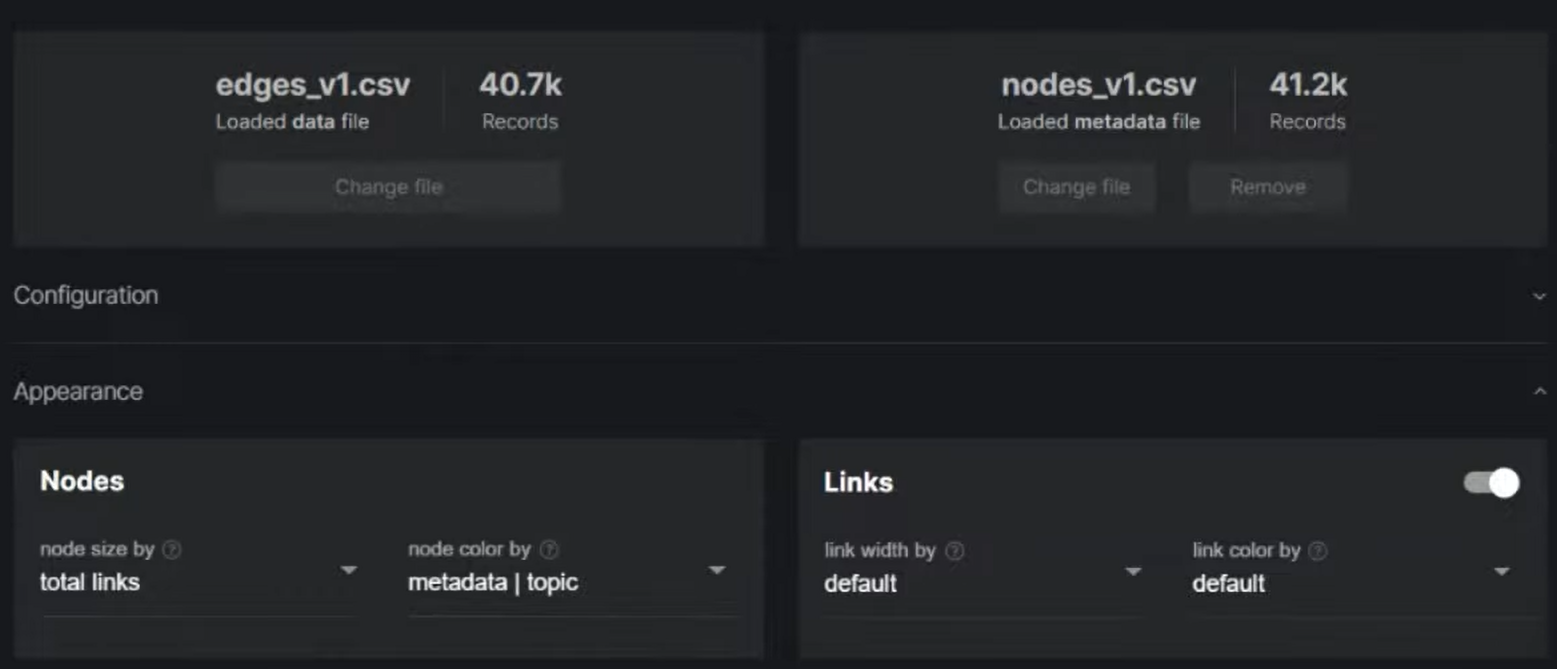

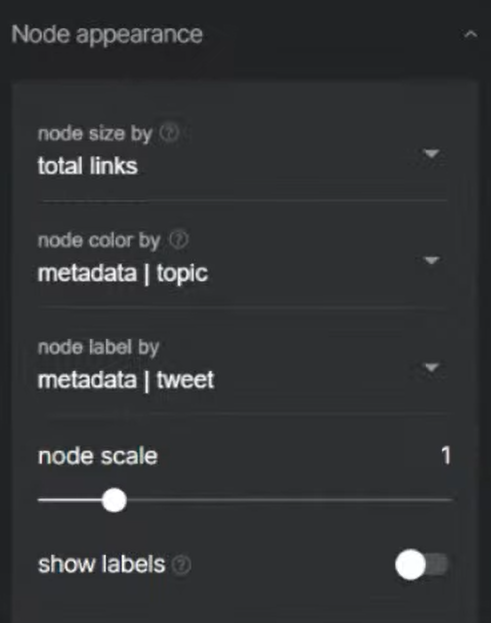

**Atenção**: você também pode usar a ferramenta **Clustering Workbench** para visualizar.

https://search.carrot2.org/#/workbench

In [ ]:
df_nodes.to_excel('nodes_v1.xlsx')

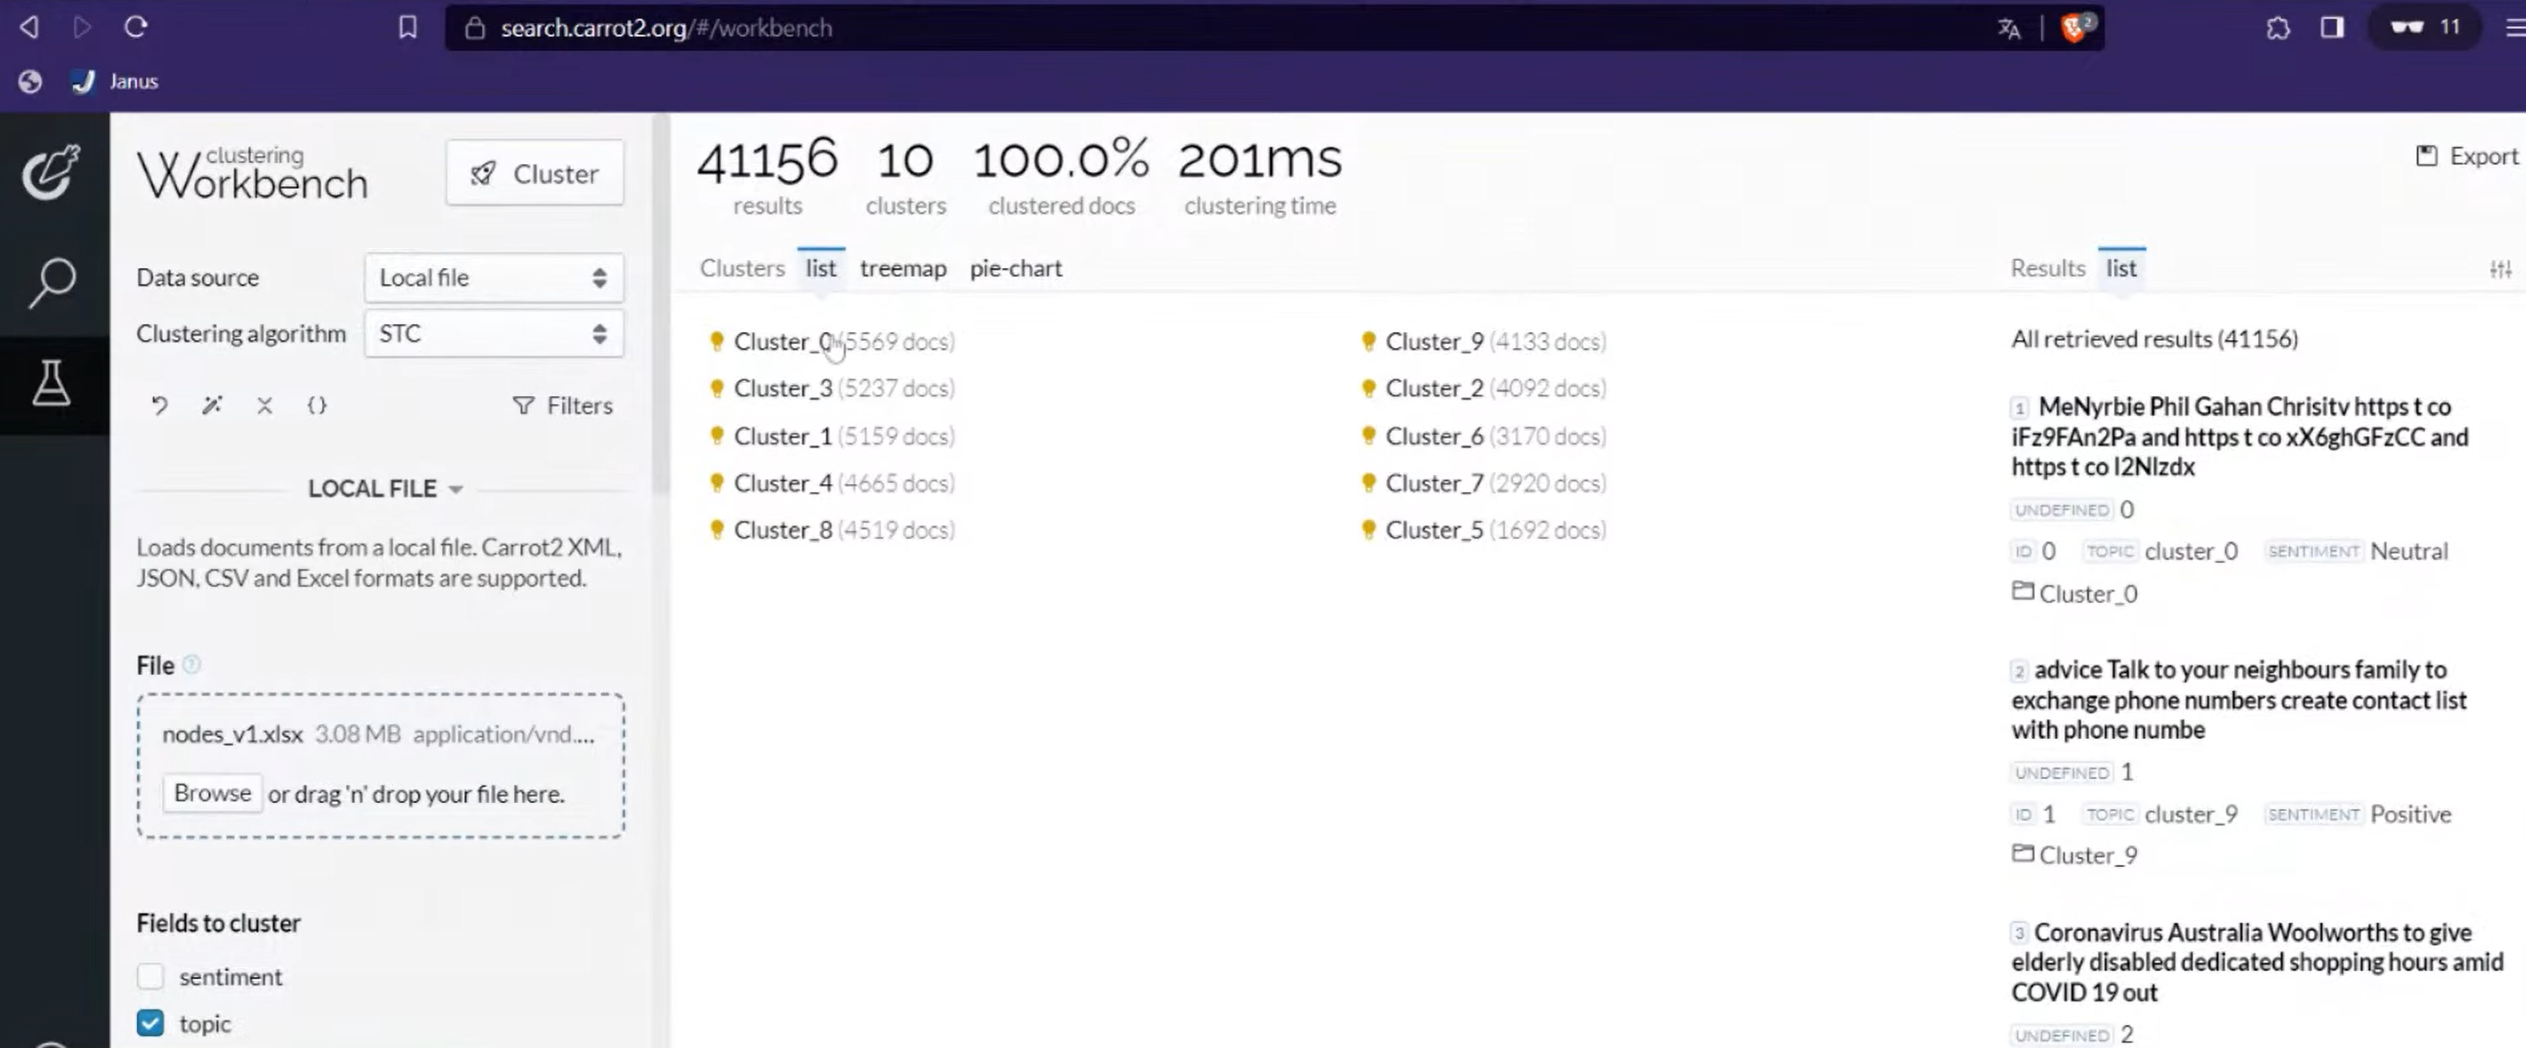

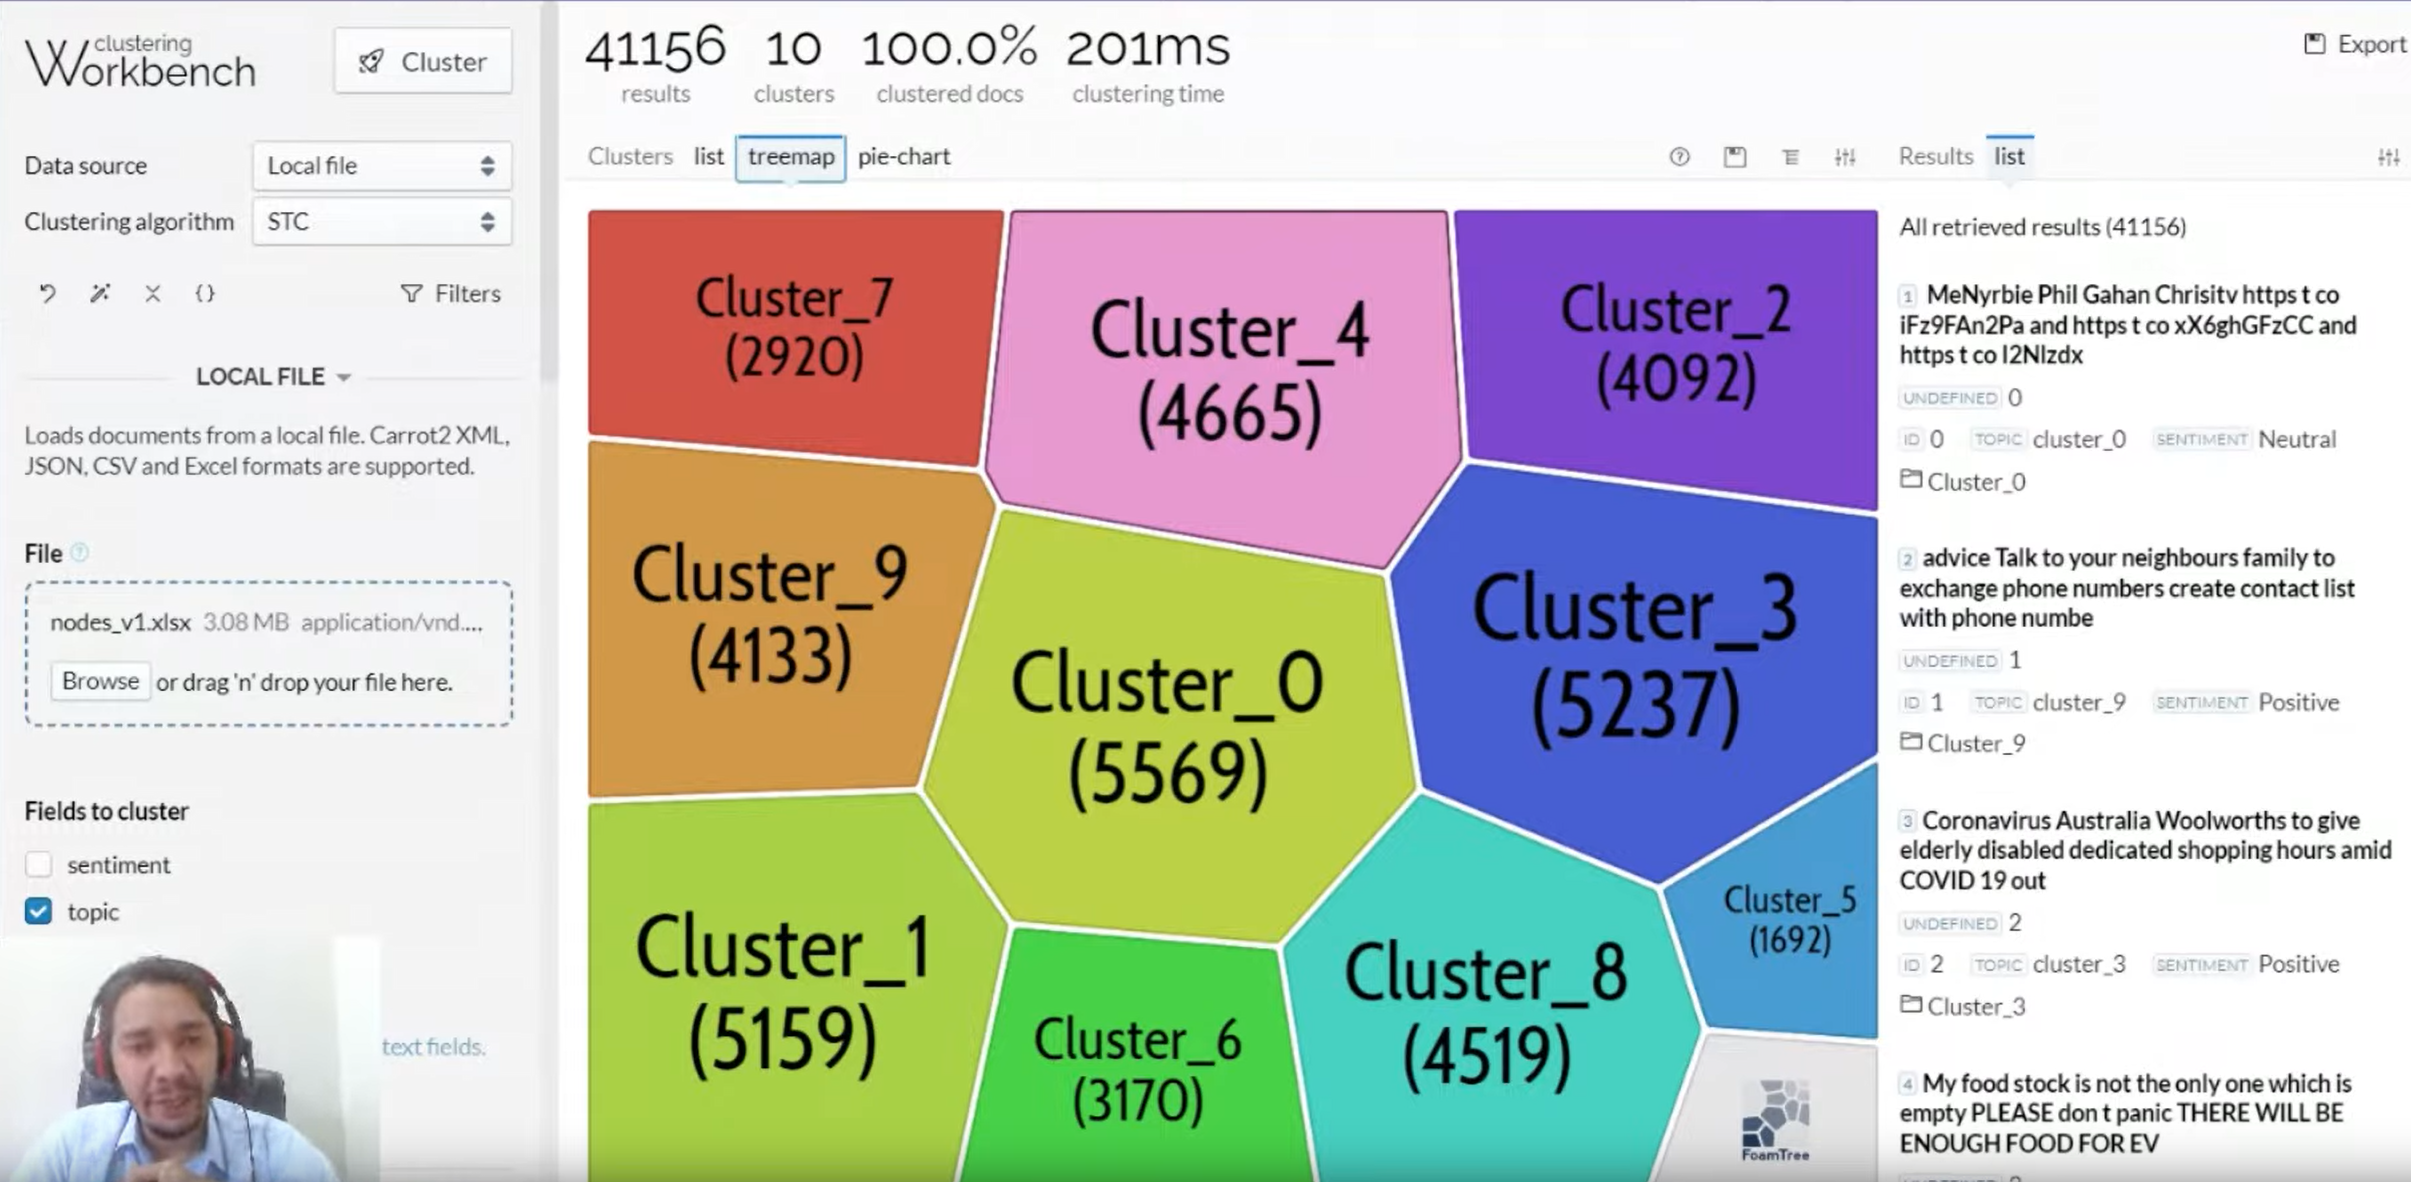

## Limitações encontradas


* Dificuldade em estimar o número de grupos
* Interpretabilidade dos grupos



A GRANDE questão é:

> **Como podemos melhorar essa tarefa usando LLMs?**

**REFERÊNCIA**

---

Notebook adaptado a partir da palestra **Integrando *Large Language Models* (LLM) em Agrupamento de Textos**, ministrada pela professor **Ricardo Marcacini** (ICMC-USP) no MBA em Inteligência
Artificial e Big Data. Os notebooks e material foram gentilmente cedidos pelo professor **Ricardo Marcacini**. Evento transmitido ao vivo em 16 de setembro de 2023.



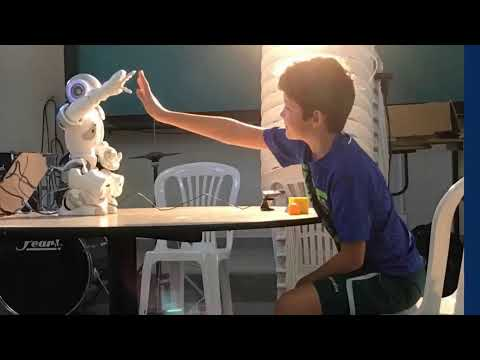

In [ ]:
from IPython.display import YouTubeVideo

display(YouTubeVideo('xkZBNio1-oc', width=550, height=310))